In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Import Keras libraries
from keras.layers import Dense 
from keras.models import Sequential

## Exploratory Data Analysis (EDA)

EDA se traduit en français pas l'analyse exploiratoire des données.
Le but de cette analyse est de découvrir des modèles, de vérifier des hypothèses, les données manquantes, de répérer les anomalies et les valeurs aberrantes.

La lecture du fichier "Prima Indians Diabète" se réalise à l'aide de la méthode read_csv() de la librairie Pandas

In [2]:
df = pd.read_csv('Pima_Indians_Diabetes.csv')
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

La méthode info() de la librairie Pandas imprime un résumé concis d'un dataframe. Cette méthode affiche des informations sur un dataframe, y compris le type d'index et les colonnes, les valeurs non nulles et l'utilisation de la mémoire.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Le jeu de données est composé de 768 lignes informatives. Chacune nous donne des informations sur des femmes indiennes au moyen de 9 attributs ou caractéristiques dont une renseignant si les 8 attributs précédents sont signes de diabète ou non. Voici les huits attributs pris en compte :
- Pregnancies : le nombre de grosses;
- Glucose : la concentration de glucose dans le sang;
- BloodPresssure : La pression artérielle en mmHg;
- SkinThickness : l'épaisseur du pli cutné du triceps en mm;
- Insulin : la concentration d'insuline dans le sang;
- BMI : Body Mass Index ou l'indice de masse corporelle;
- DiabetesPedigreeFunction : La fonction généalogique du diabète (DPF) estime la probabilité de diabète en fonction de l'âge du sujet et de ses antécédents familiaux de diabète, qui sont considérés comme les principaux facteurs de risque;
- Age : l'âge.

La dernière colonne Outcome intègre la classification de femmes présentant du diabète (1) ou non (0) 

La méthode head() de la bilbiothèque Pandas renvoie les 5 premières lignes.

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

La méthode describe() de la librairie Pandas génère des statistiques descriptives telles que :
- le nombre de valeurs non nulles;
- la moyenne;
- l'écart-type;
- le minimum;
- les centiles à 25 %, 50% et 75%.

L'attribut .T de la librairie Pandas transpose l'index et les colonnes. Autrement dit cette méthode permet de refléter le dataframme sur sa diagonale principale en écrivant des lignes sous forme de colonnes et vice-versa. Cette méthode est très utile déduire le prétraitement à réaliser.

In [5]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

Nous pouvons remarquer que la valeur minimale des colonnes comme Glucose, BloodPressure, SkinThickness, Insulin est égale à 0. Il convient donc de vérifier la présence de ces valeurs nulles dans chaque colonnes du dataset. Pour ce faire, un nouveau dataframe dénommé temp est crée. Il intègre toutes les colonnes sauf celle désignée par Outcome qui contient les classes d'étiquetage 0 ou 1 des patients présentant ou non du diabète. Le dataframe temp est utilisé pour calculer le pourcentage de valeurs nulles présentes dans les différentes colonnes du dataframme temp. La méthode loc() de la bibliothèque Pandas permet d'accéder à un groupe de lignes et de colonnes par libellé(s).

In [6]:
temp = df.loc[:, df.columns != 'Outcome'].columns.values
# Création du nouveau dataframe temp sans la colonne Outcome

In [7]:
percent_zero_values = ((df[temp] == 0).sum() / len(df)*100)
# Somme de toutes les valeurs nulles divisées par le nombre de lignes du dataframe temp.
percent_zero_values

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

La visualisation sous forme d'un graphique à barres présente l'avantage de mettre en lumière une tendance sur le prétraitement à réaliser. Comme nous l'avons déjà remarqué précédemment, les colonnes Insulin et SkinThickness présente un pourcentage élevée de valeurs nulles.

<AxesSubplot: >

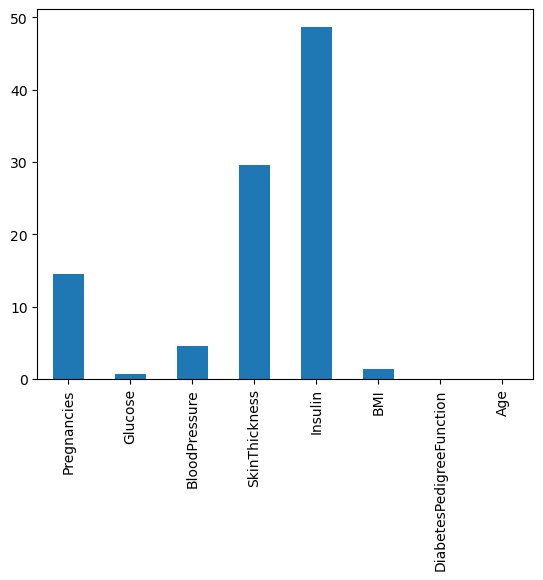

In [8]:
percent_zero_values.plot(kind = 'bar')

## Gestion des valeurs nulles et des valeurs aberrantes

Des colonnes présentant des valeurs nulles ont été identifiées précédemment comme problématique. Ces valeurs à 0 sont probablement des espaces pour les données manquantes. Ces zéros vont être remplacés par NaN afin qu'ils puissent être traités comme valeurs manquantes. L'ensemble des colonnes concernées sont :

- Glucose;
- BloodPressure;
- SkinThickness;
- Insulin;
- BMI.

Une liste dénommée ColumnsWithNullvalues intégrant ces dénominations de colonnes est crée. 


In [9]:
ColumnsWithNullvalues = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

La méthode replace() va permettre de modifier les valeurs à 0 par la valeur NaN

In [10]:
df[ColumnsWithNullvalues] = df[ColumnsWithNullvalues].replace(0, np.NaN)

In [11]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [12]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Le tracé de la matrice de corrélation :

<AxesSubplot: >

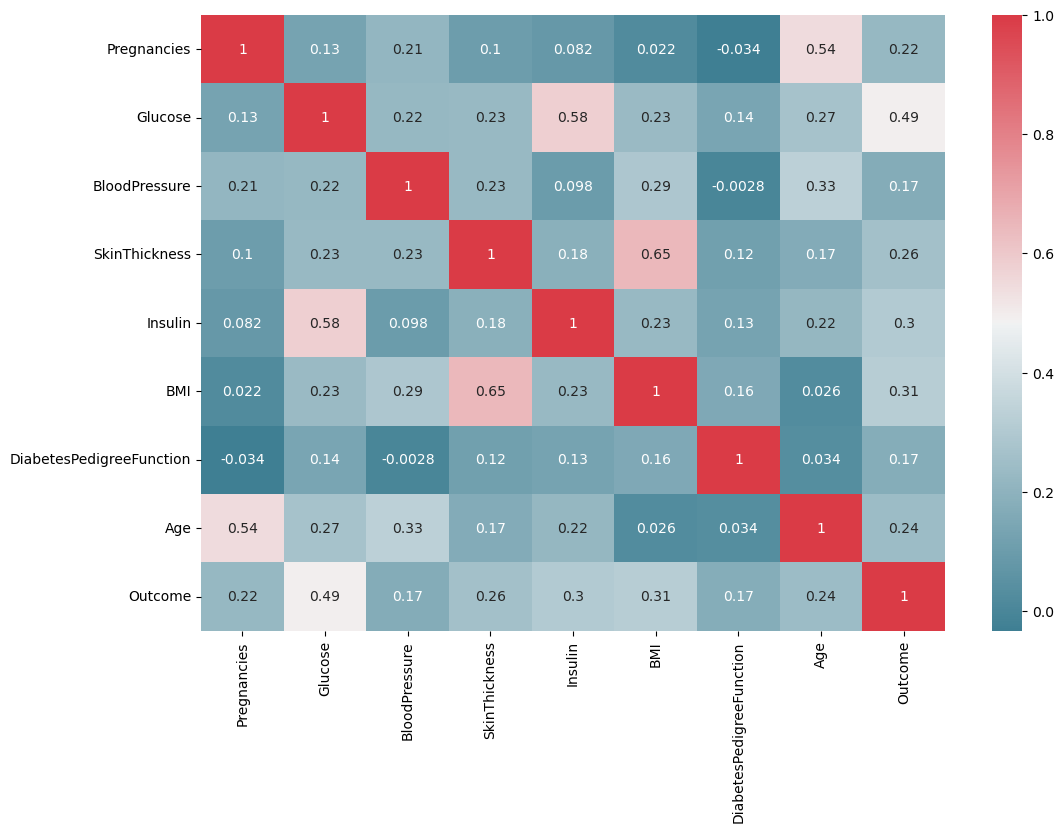

In [14]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            cmap = sns.diverging_palette(220, 10, as_cmap = True),
            annot = True)

Le tracé affiche le coefficient de corrélation. Il s'agit d'une mesure spécifique qui quantifie la force de relation linéaire entre deux variables d'une analyse de corrélation. La formule va comparer pour deux variables la distance de chaque point de données depuis la moyenne de la variable. Pour ensuite l'utiliser dans le but d'indiquer dans quelle mesure la relation entre les variables suit une ligne imaginaire tracée dans les données, d'où l'appelation corrélations en lien avec les relations linéaires. 

Cette matrice de corrélation est utile pour identifier les attributs fortement corrélés entre eux comme :
- SkinThickness et BMI - les femmes ayant une valeur d'épaissaeur de pli cutané plus élevée ont un IMC plus élevée;
- Age et Pregnancies - les femmes plus âgées ont tendance à avoir plus d'enfants;
- Insuline et Glucose - un pic d'insuline signale au foie que la glycémie est également élevée.

On peut également donc remarquer que le glucose a une corrélation positive modérée avec la présence de diabète (Outcome - Glucose à 0.49). Les autres attributs ont une corrélation positive faible avec la présence de diabète. 

Moyenne de l'ensemble des attribut pour chaque classe d'étiquetage :

In [15]:
df.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.643863      70.877339      27.235457  130.287879   
1           4.865672  142.319549      75.321429      33.000000  206.846154   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.859674                  0.429734  31.190000  
1        35.406767                  0.550500  37.067164

D'après ce jeu de données, les femmes diabétiques ont tendance à avoir des valeurs plus élevées dans tous les attributs.
Les deux groupes ont un IMC bien supérieur à la normale (18.5 à 24.9) et aussi une moyenne de glucose plus élevée que la normale (<= 100 mg/dL).
Les femmes atteintes de diabète sont plus susceptibles d'avoir des antécédents ancestraux. Ces femmes ont un taux d'insuline plus élevé que la normale (16 à 166 μU/mL).

<AxesSubplot: >

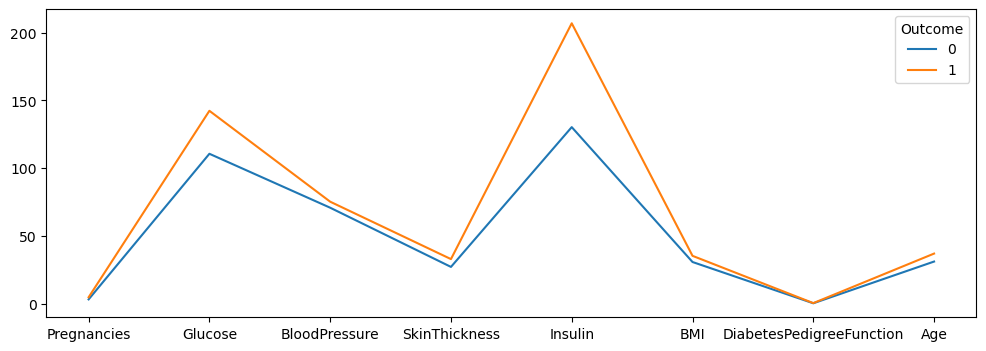

In [16]:
df.groupby('Outcome').mean().T.plot(figsize=(12,4))

La colonne Outcome est dédiée l'étiquette de classification de présence de diabète ou non.

<AxesSubplot: xlabel='Outcome', ylabel='count'>

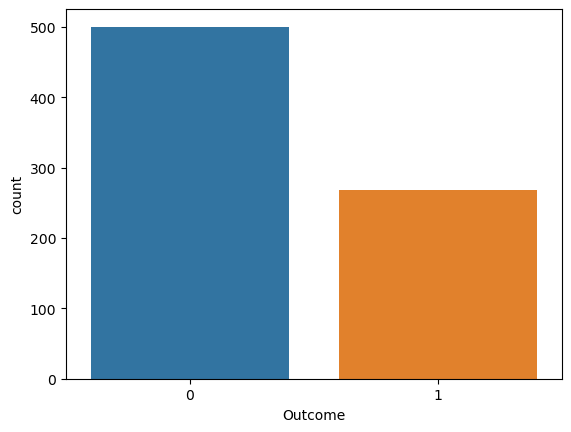

In [17]:
sns.countplot(x = 'Outcome', data = df)

Nous allons maintenant compter le nombre de lignes pour chaque valeur.

In [18]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

500 lignes présentent une présence de diabète et 268 n'en présente pas

Le tracé sous la forme d'histogrammes de la distribution de chaque attributs dans le jeu de données :

Tracé univarié de la distribution de données :

Les valeurs manquantes doivent maintenant être imputer. Avant cela, il est préférable de reconnaître le type de distributions de données soit la distribution normale soit la ditribution asymétrique. 

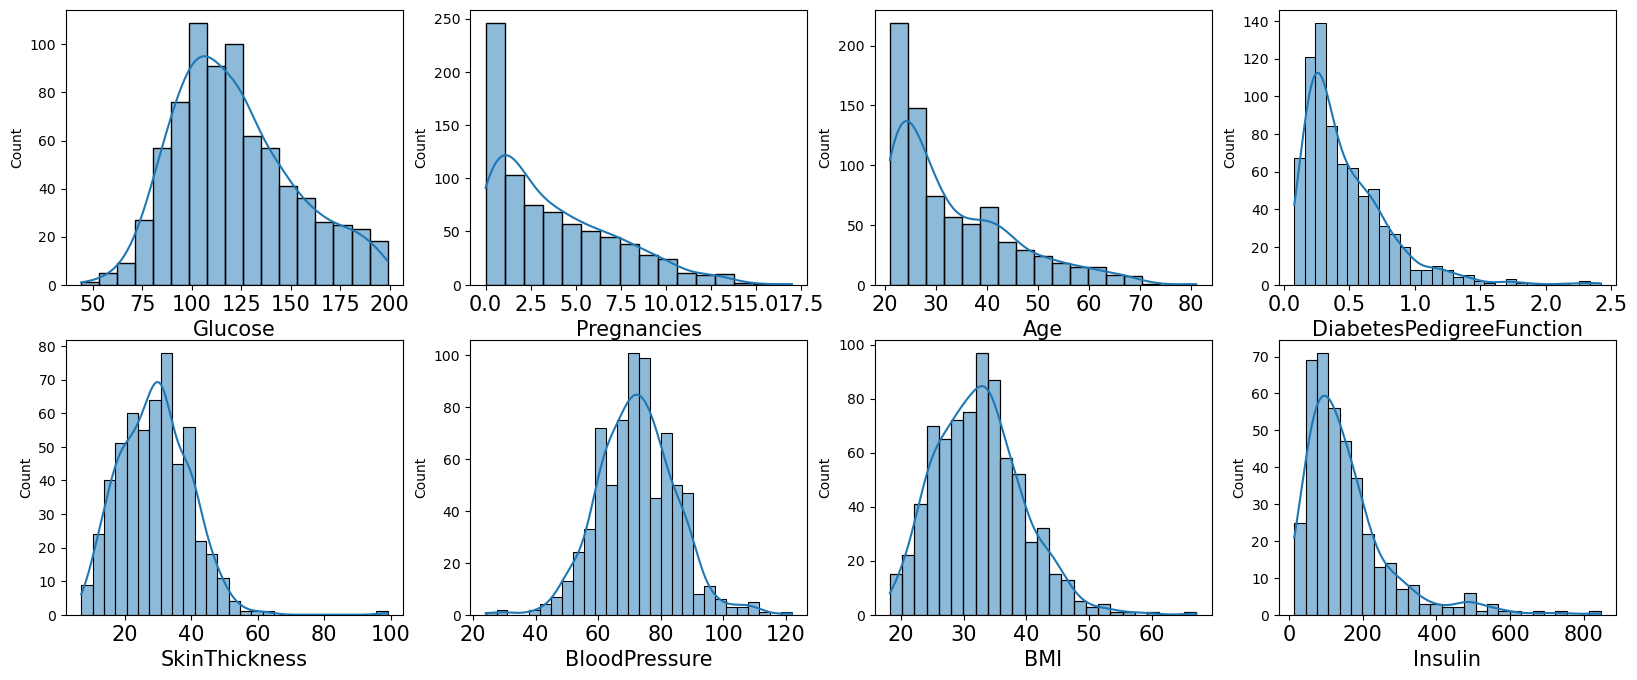

In [19]:
plt.figure(figsize=(20,25)) 
for i,col in enumerate(set(df.columns)-{'Outcome'}): 
    plt.subplot(6,4,i + 1)
    sns.histplot(df [col], kde = True)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 15)

La distribution de la BMI, BloodPressure et SkinThickness est normale. Les autres distributions sont asymétriques.
Pour ces premières, les valeurs manquantes peuvent être remplacer par la moyenne et pour les autres distributions, les valeurs manquantes sont remplacer par la médiane.

In [20]:
df1 = df.copy(deep=True)
for column in df1[['BloodPressure', 'BMI', 'SkinThickness']]:
    df1[column] = df1[column].fillna(df1[column].mean())
for column in df1[['Pregnancies', 'Glucose', 'DiabetesPedigreeFunction', 'Age']]:
    df1[column] = df1[column].fillna(df1[column].median())

SkinThickness et Insulin présentent un nombre élevé de valeurs manquantes. Nous devons donc utiliser KNNImputer pour ces attributs car l'utilisation de la moyenne et de la médiane conduit à de la création de nombreuses valeurs aberrantes.

In [21]:
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors = 5, weights = 'distance', metric = 'nan_euclidean',) 
imputed_data = imputer.fit_transform(df1) 
df2 = pd.DataFrame(imputed_data) 
df2.columns = df1.columns

Graphique en boîte pour vérifier les valeurs aberrantes :

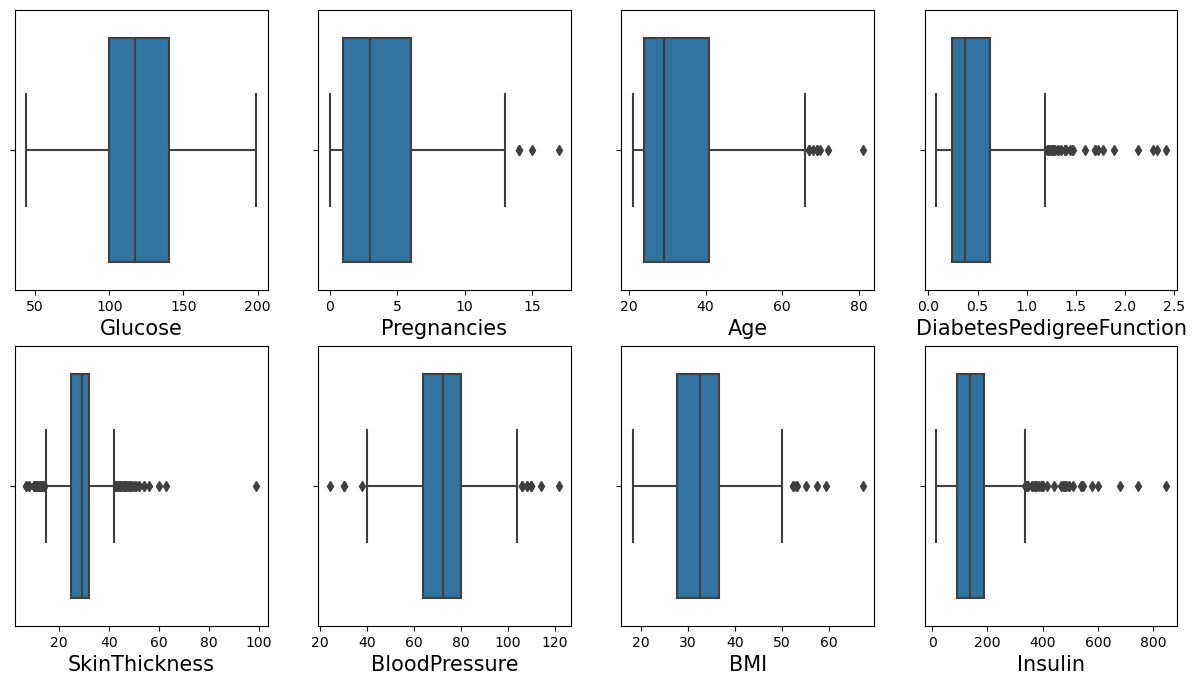

In [22]:
plt.figure(figsize=(15, 8))
for i,col in enumerate(set(df2.columns)-{'Outcome'}):
    plt.subplot(2,4,i + 1)
    sns.boxplot(data = df2,x = col)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)

Nous pouvons observer de nombreuses valeurs aberrantes pour chaque attribut. Les valeurs aberrantes sont des valeurs d'un ensemble de données qui varie considérablement par rapport à d'autres bien regrouper. Nous devons les supprimer ou les remplacer pour obtenir une meilleure précision de prédiction.

In [23]:
def detect_outliers(df2):
    outliers= pd.DataFrame(columns = ["Feature","No.of Outliers","Handled?"])
    for col in list(set(df2.select_dtypes(include = np.number).columns)-{'Outcome'}):
        q1 = df2[col].quantile(0.25)
        q3 = df2[col].quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)
        n = df2.loc[(df2[col] < low) | (df2[col] > high)].shape[0]
                   
        df2.loc[(df2[col] < low), col] = low
        df2.loc[(df2[col] > high), col] = high
 #let's fix them
#df[col] = np.where((df[col] > fence_high) | (df[col] > fence_high),df[col].median(),df[col])
        outliers = outliers.append({'Feature': col, "No.of Outliers": n ,"Handled?": df2[col].all() < high},ignore_index=True)
    return outliers
detect_outliers(df2)

/var/folders/nx/wts337112p53xn03jx2yz0r40000gn/T/ipykernel_45411/3198600957.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Feature': col, "No.of Outliers": n ,"Handled?": df2[col].all() < high},ignore_index=True)
/var/folders/nx/wts337112p53xn03jx2yz0r40000gn/T/ipykernel_45411/3198600957.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Feature': col, "No.of Outliers": n ,"Handled?": df2[col].all() < high},ignore_index=True)
/var/folders/nx/wts337112p53xn03jx2yz0r40000gn/T/ipykernel_45411/3198600957.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  outliers = outliers.append({'Feature': col, "No.of Outliers": n ,"Ha

Feature No.of Outliers Handled?
0                   Glucose              0     True
1               Pregnancies              4     True
2                       Age              9     True
3  DiabetesPedigreeFunction             29     True
4             SkinThickness             87     True
5             BloodPressure             14     True
6                       BMI              8     True
7                   Insulin             35     True

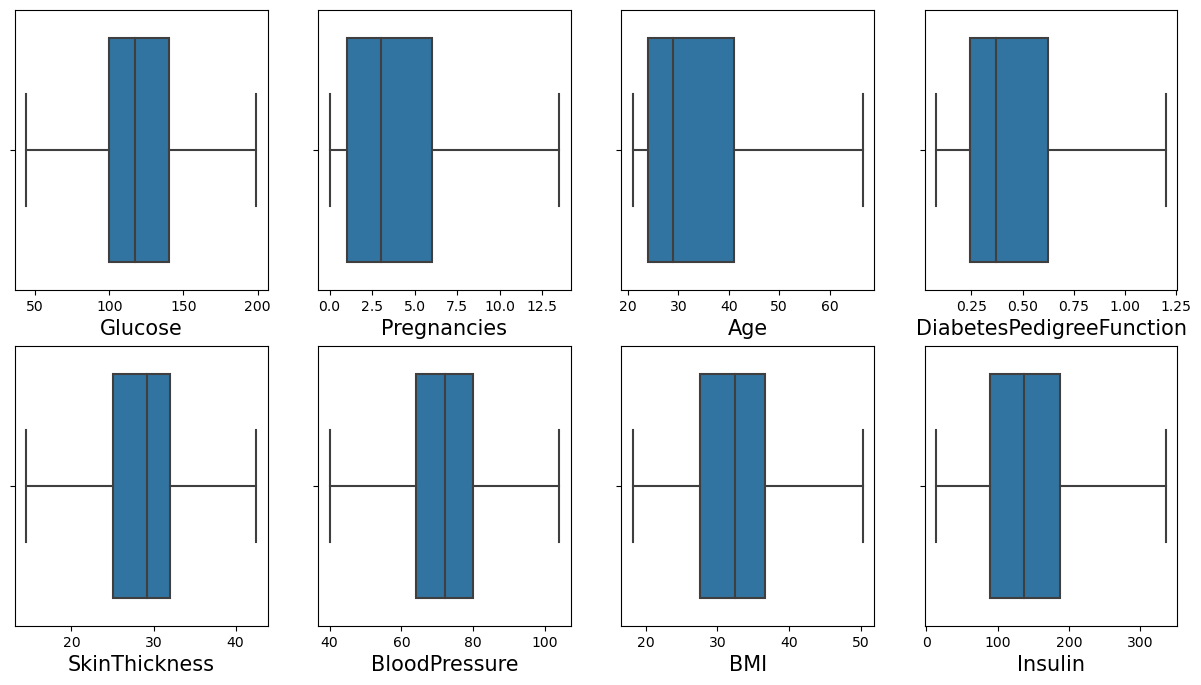

In [24]:
plt.figure(figsize = (15,8)) 
for i,col in enumerate(set(df2.columns)-{'Outcome'}): 
    plt.subplot(2,4,i + 1) 
    sns.boxplot(data = df2,x = col) 
    plt.xlabel(col, fontsize = 15) 
    plt.xticks(fontsize = 10)

Les données sont maintenant exemptes de valeurs aberrantes.

Graphes bivariés :

Un graphique de paires permet de visualiser les relations entres deux variables ainsi que la distribution de chaque variable.

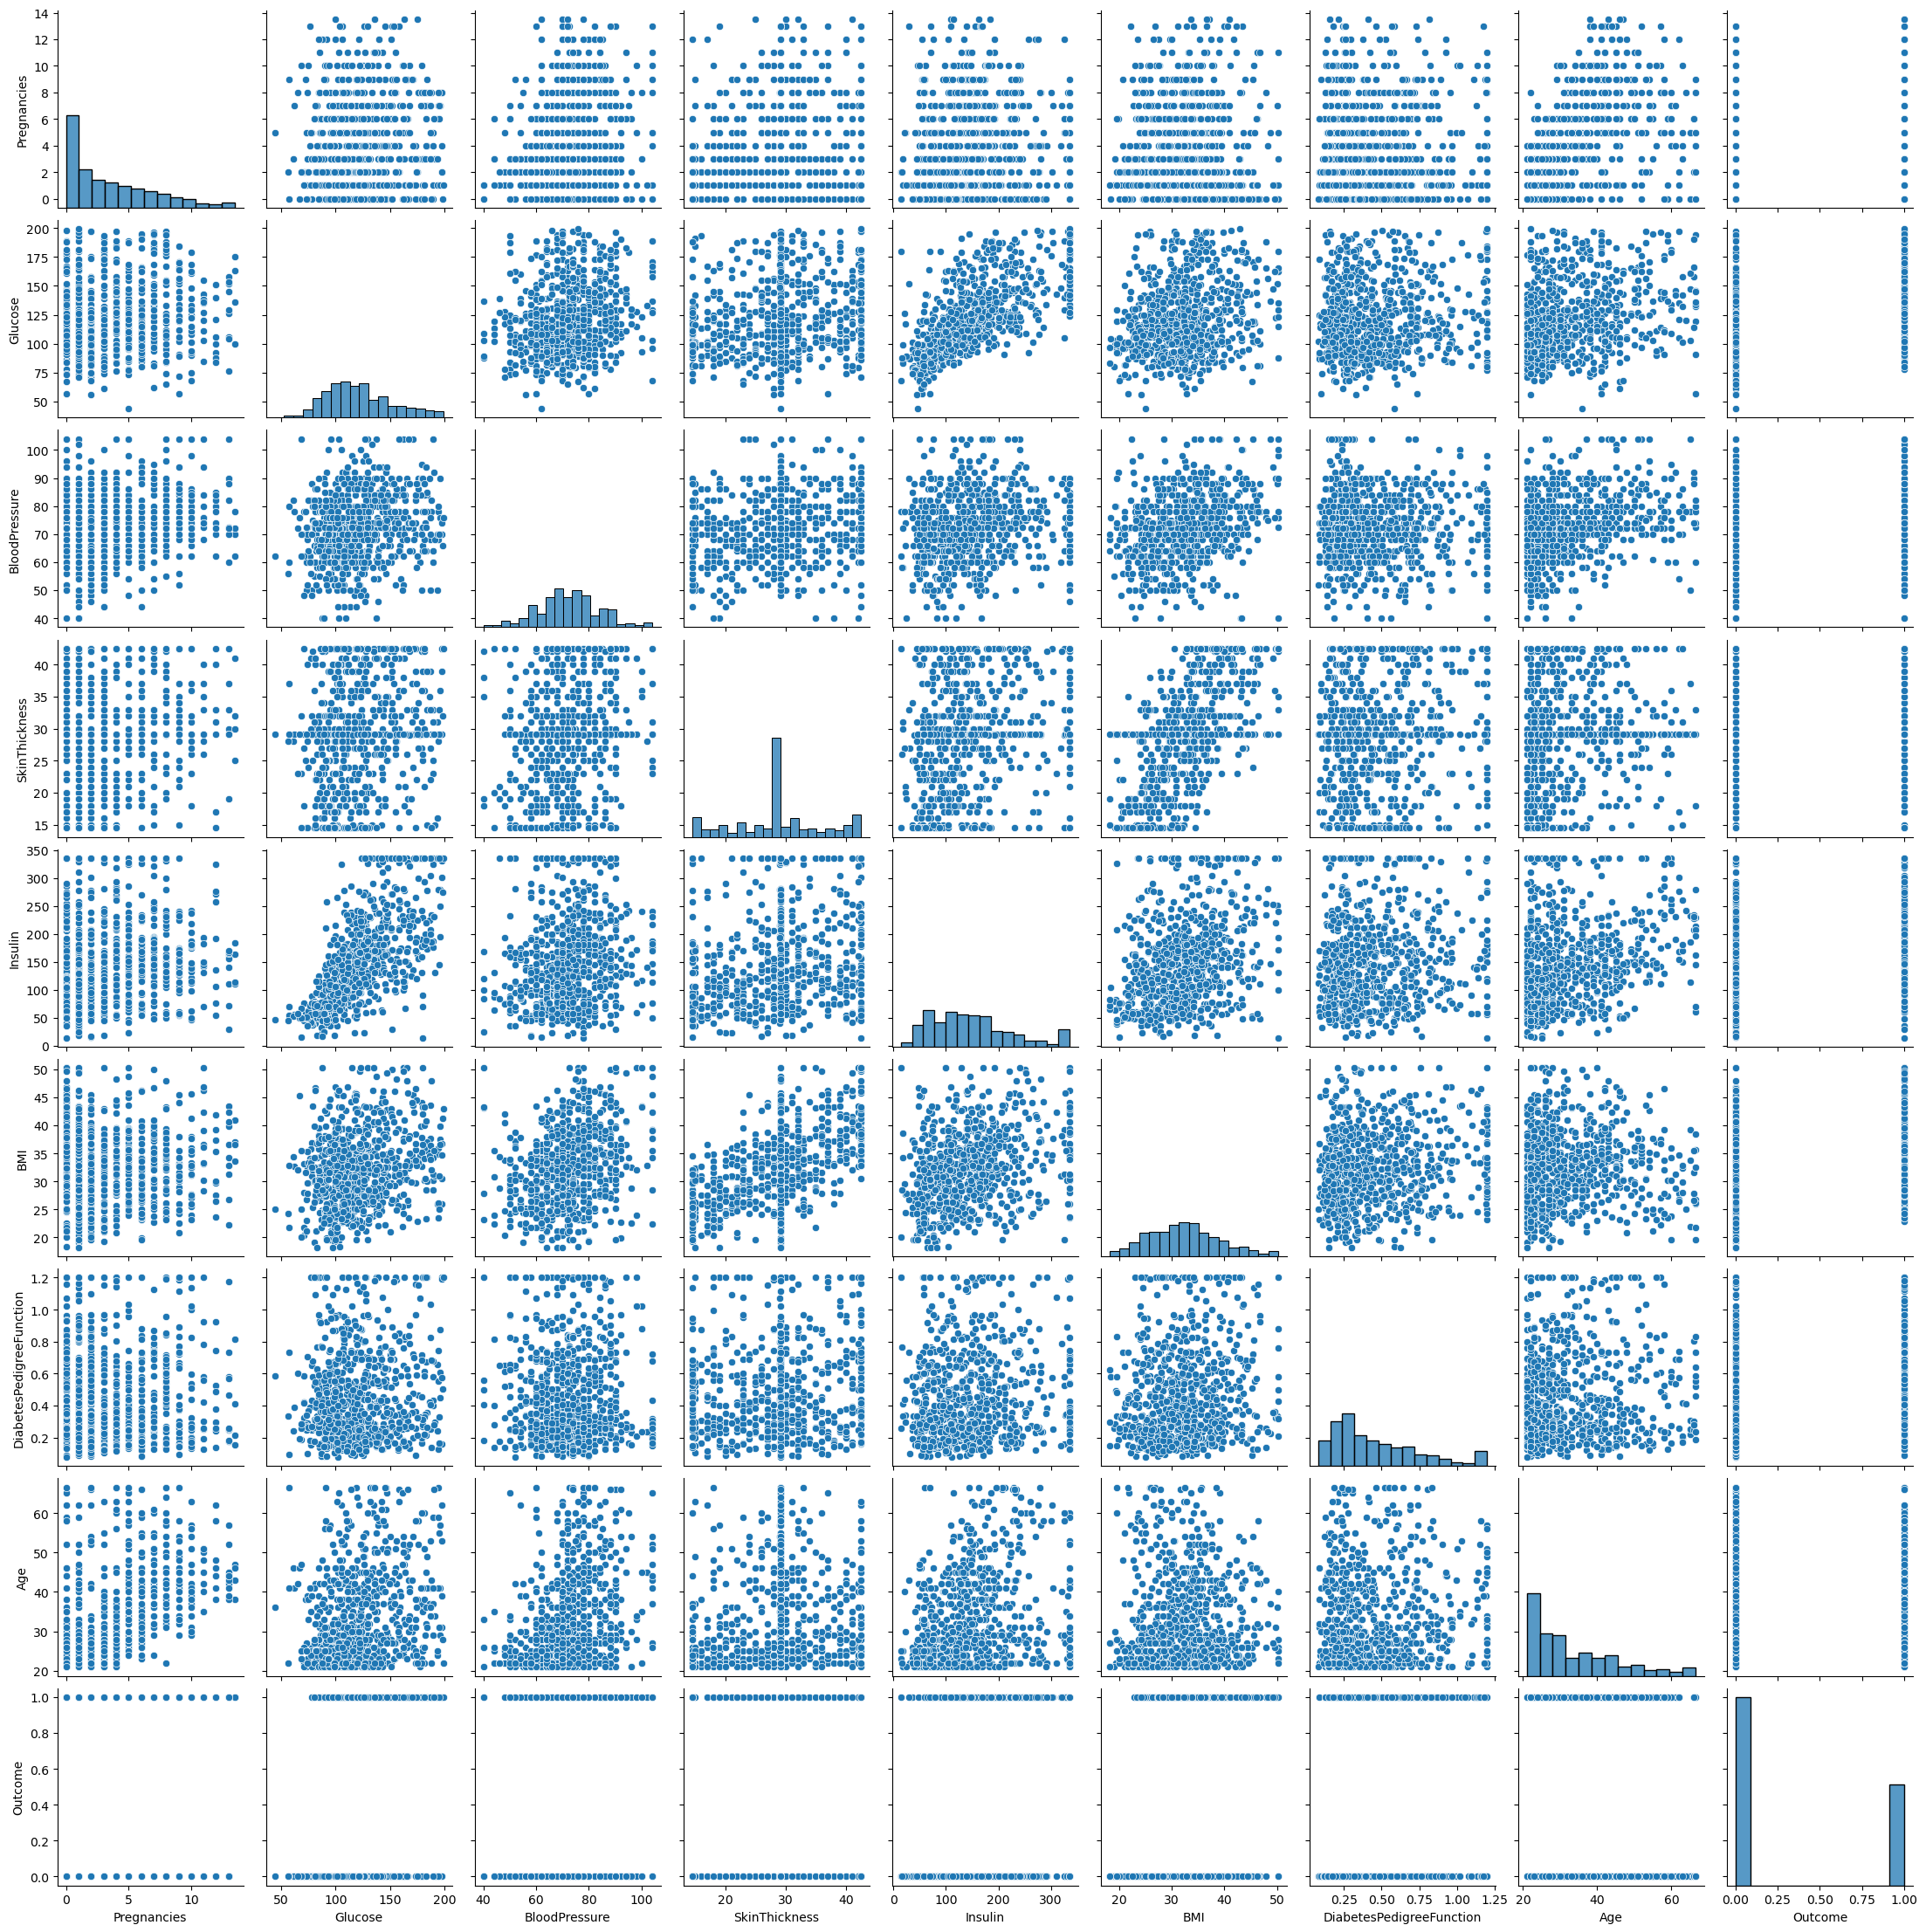

In [25]:
sns.pairplot(data = df2, kind = 'scatter')

Une relation linéaire élevée entre BMI et SkinThinkness et aussi Insulin et Glucose.

Nous pouvons également visualiser la larelation entre deux variables par rapport à une troisième variable comme par exemple Outcome, au moyen du paramètre hue :

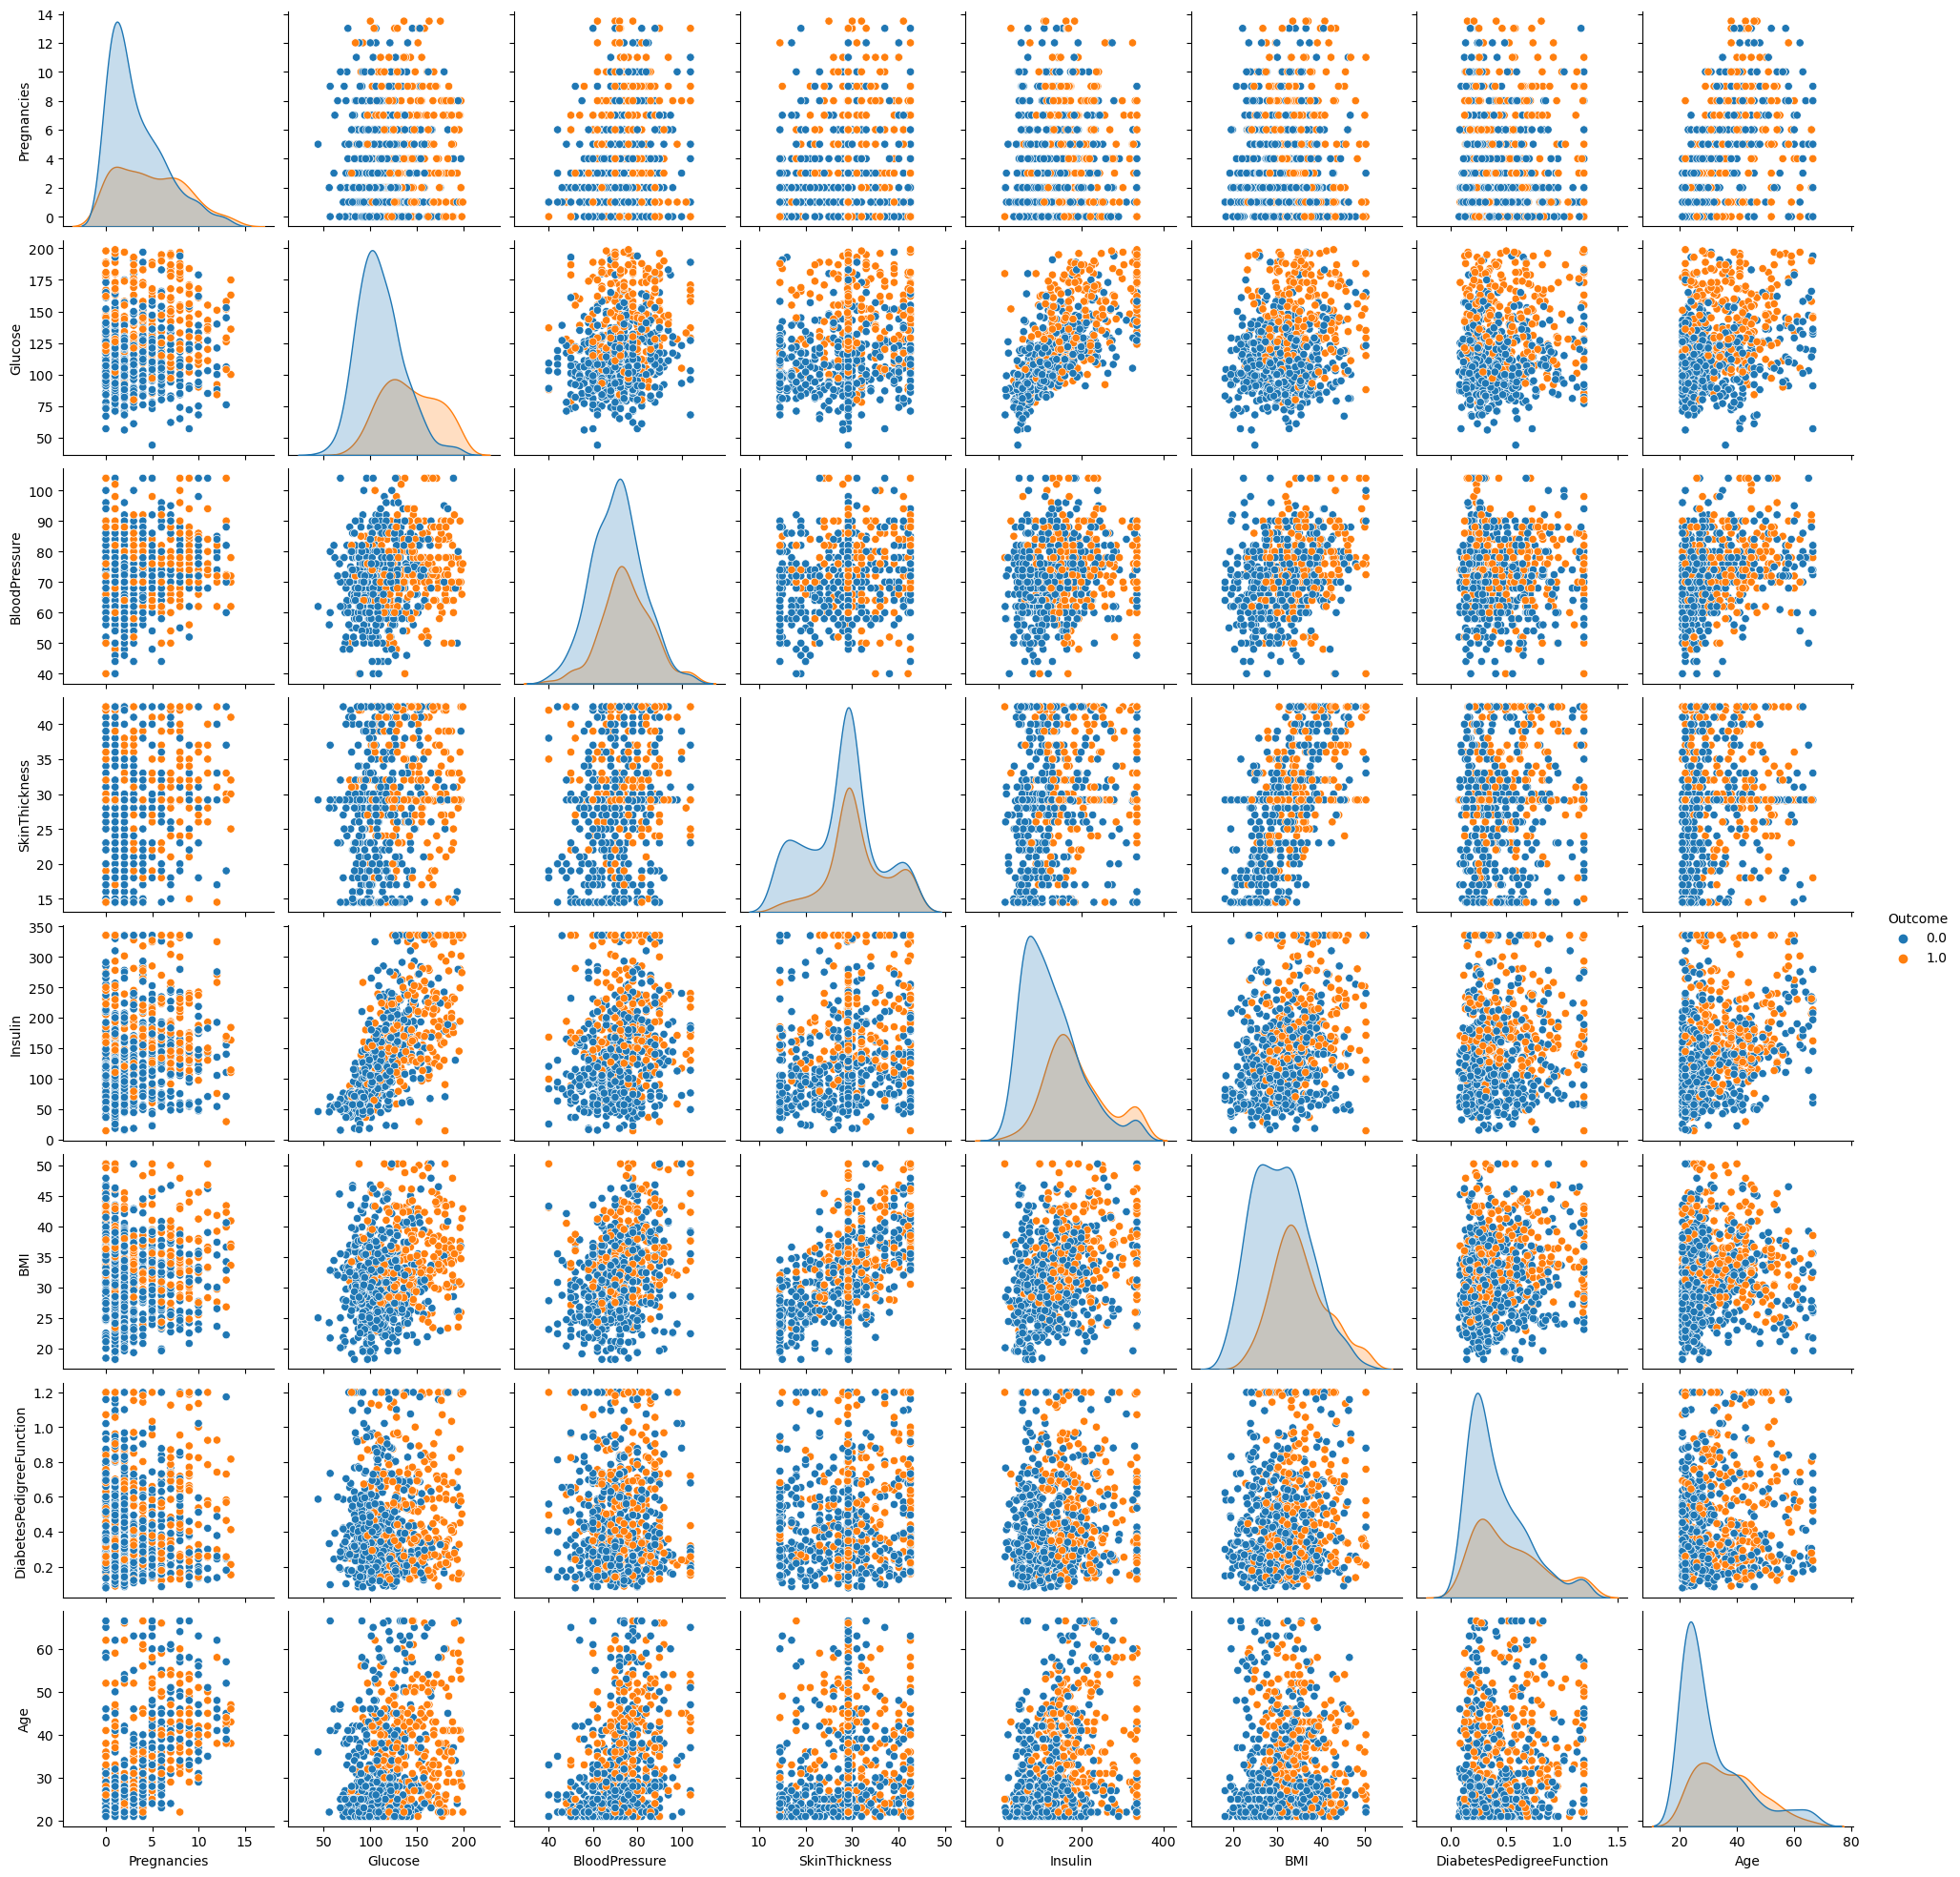

In [26]:
sns.pairplot(data = df2, hue = 'Outcome')

Les femmes diabétiques ont tendance à avoir une valeur plus élevée pour chaque attributs.

Kdeplot  est un graphique d'estimation de la distribution du noyau décirvant la fonciton de densité de probabilité des variableds de données.

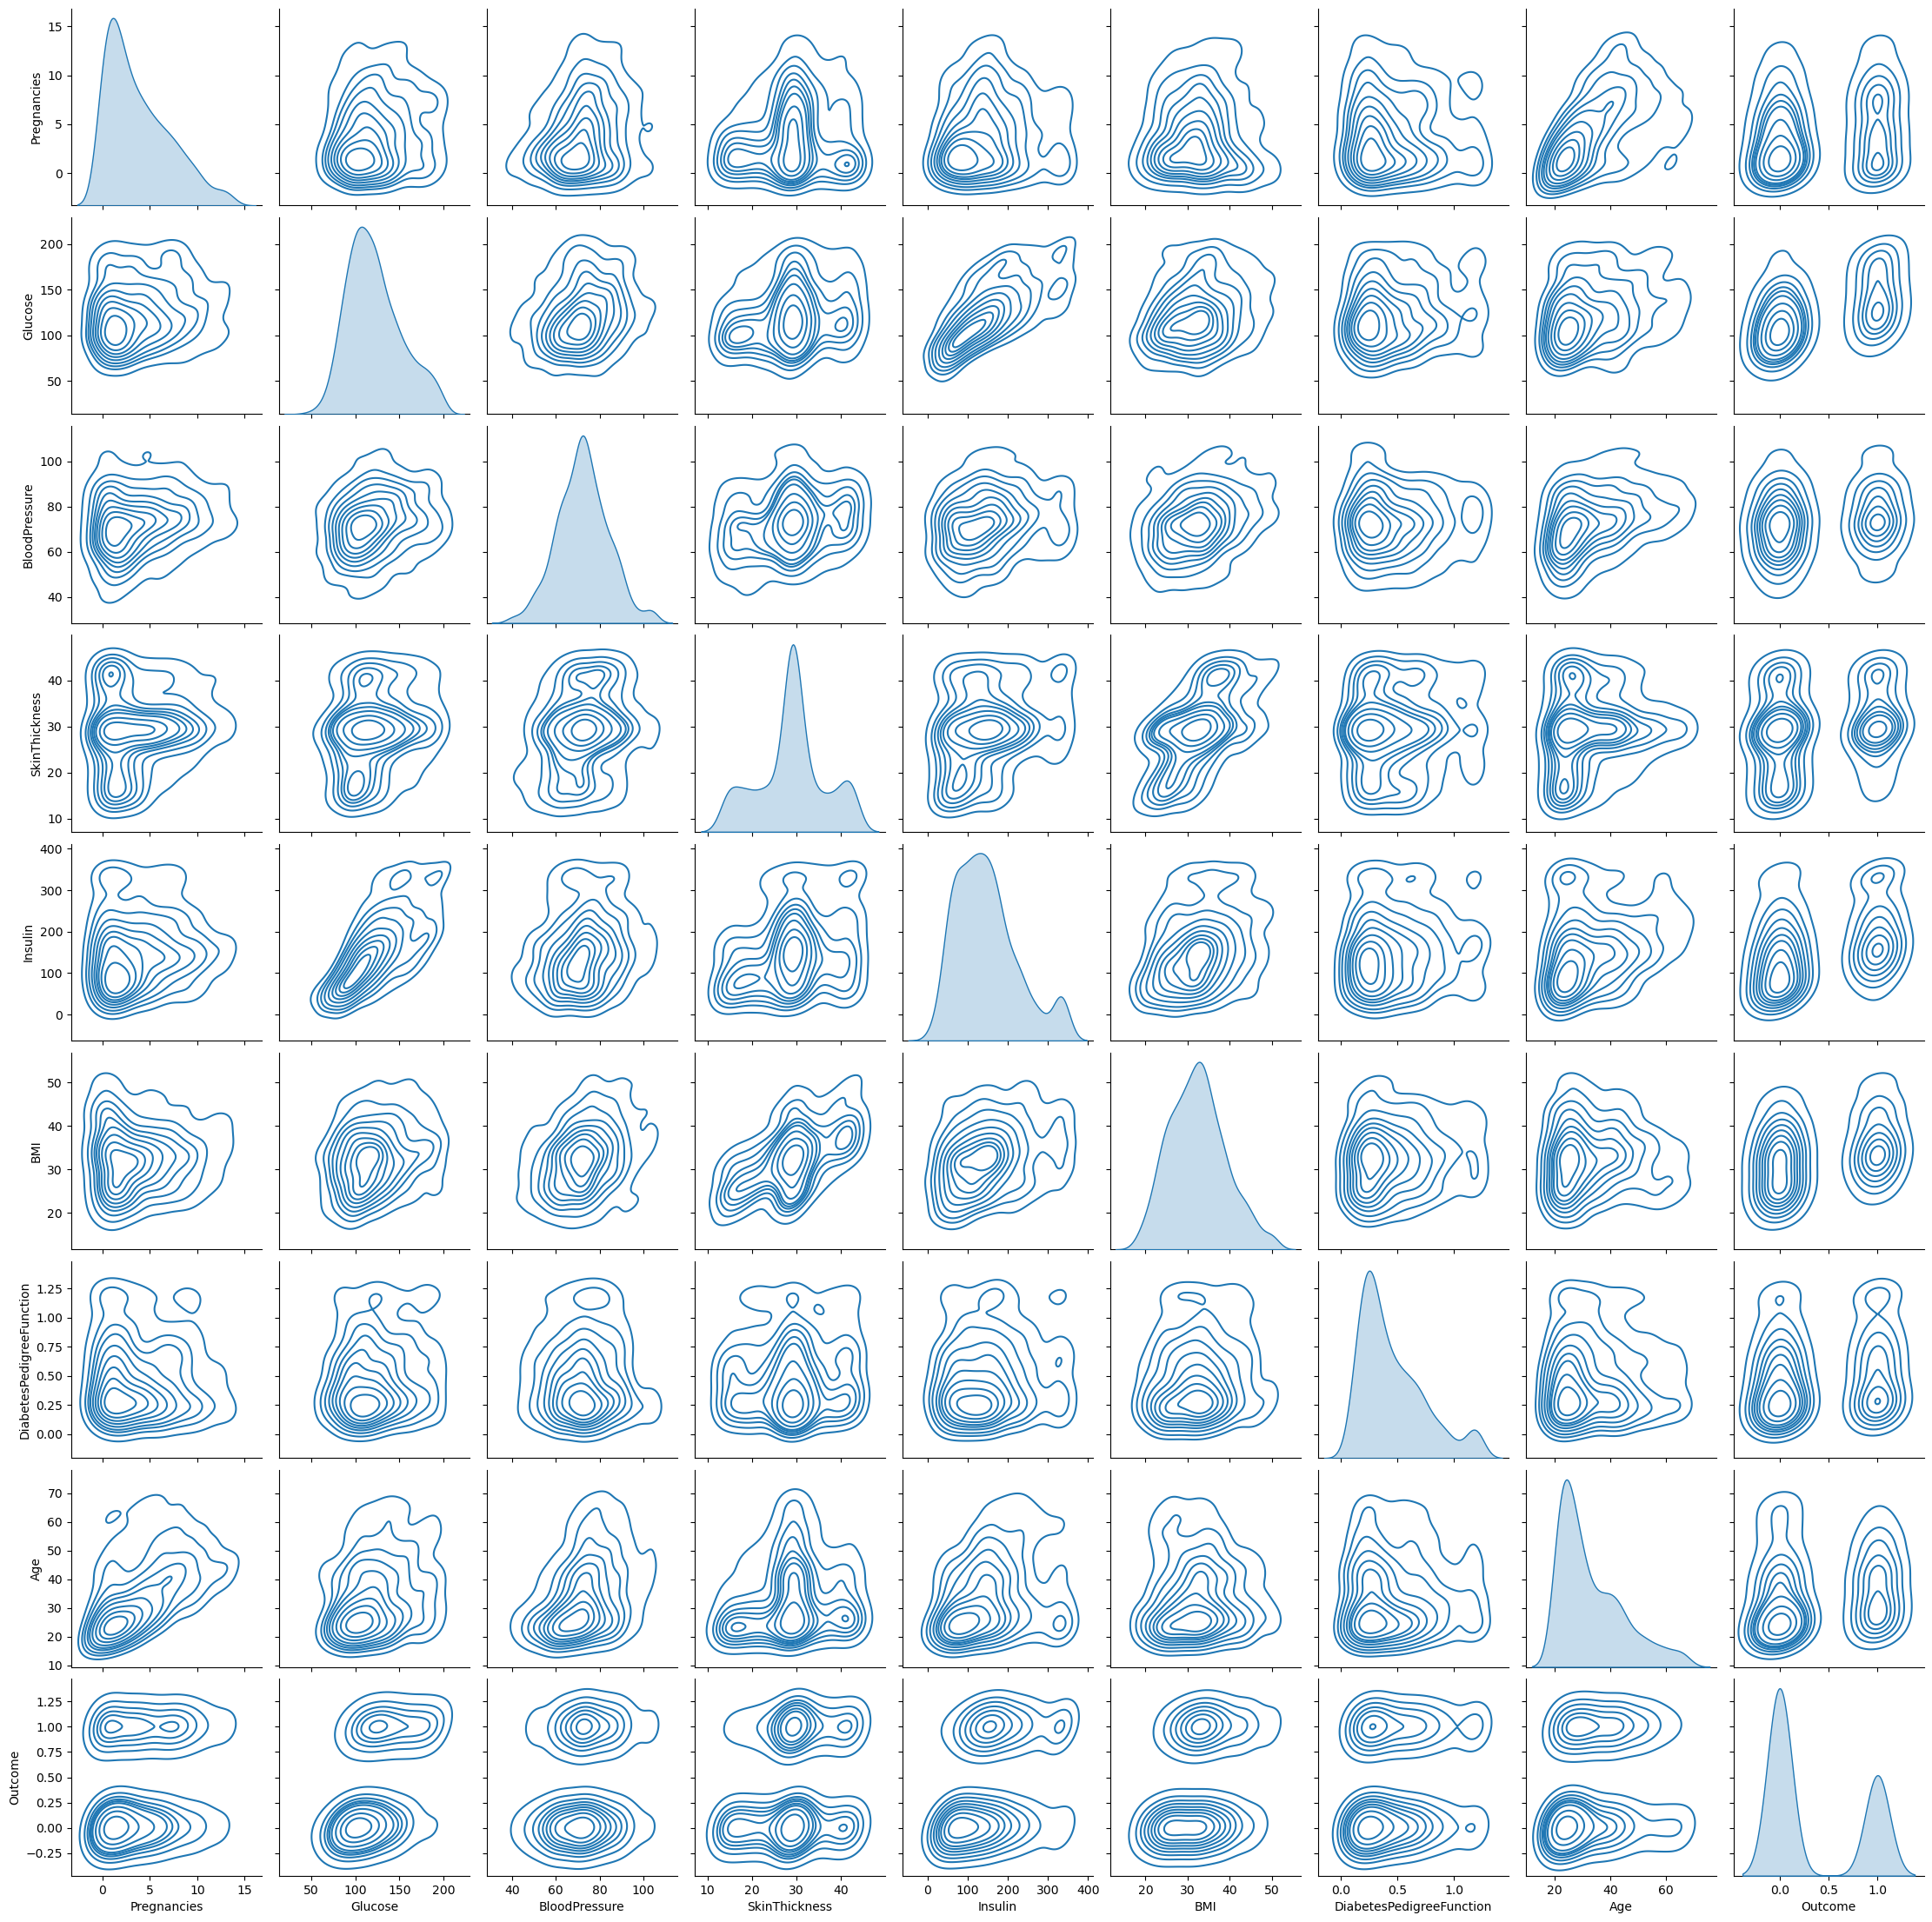

In [27]:
sns.pairplot(data = df2, kind = 'kde')

Ce graphe détaille la relation linéaire entre le glucose et l'insuline ainsi que leurs distributions univariées. Les deux sont asymétriques vers la droite.

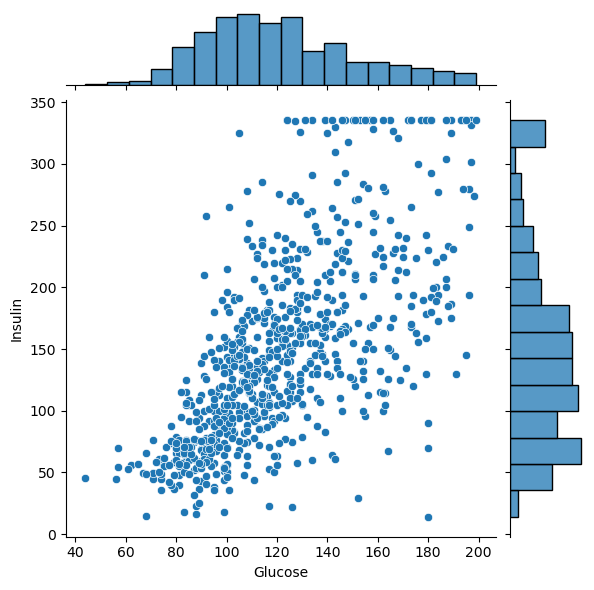

In [28]:
sns.jointplot(x = 'Glucose', y = 'Insulin', data = df2)

Le tracé conjoin par rapport à la variable 'Outcome' et le paramètre hue

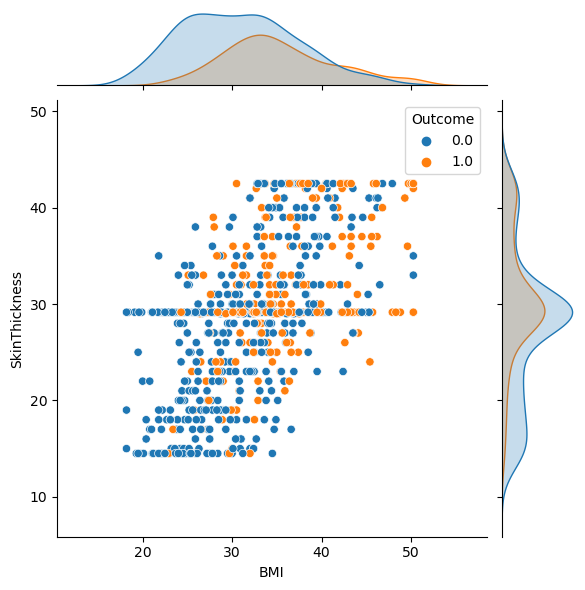

In [29]:
sns.jointplot(x = 'BMI', y = 'SkinThickness', data = df2, hue = 'Outcome')

Ce graphe montre la relation linéaire entre le BMI et le SkinThickness. Leurs distributions univariées montre que les deux caractéristiques ont une distribution asymétrique.

Vérifier l'importance des attributs :

In [30]:
from sklearn.ensemble import ExtraTreesRegressor 
x = df2.drop("Outcome", axis = 1)
y = df2.Outcome
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)

[0.0958555  0.27078462 0.08073253 0.07017771 0.12387694 0.13696373
 0.09811309 0.12349589]


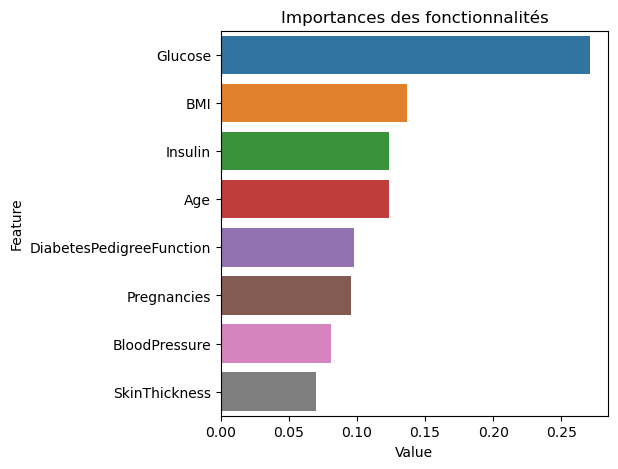

In [31]:
#visualiser par graphique à barres
feature_imp = pd.DataFrame({'Value' : model.feature_importances_, 'Feature' : x.columns}) 
plt.figure(figsize = (5, 5)) 
sns.barplot(x = 'Value',y = 'Feature', data = feature_imp.sort_values(by = 'Value',ascending = False)) 
plt.title('Importances des fonctionnalités') 
plt.show()

Nous pouvons remarquer que le niveau de glucose a un impact conséquent sur la prédiction du diabète, suivi du BMI, puis l'insulin et l'âge.

In [32]:
#scaling is required before applying pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)
scaled_data = pd.DataFrame(scaled_data)
scaled_data
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4'])
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.31776742 0.18058808 0.14458008 0.11892014]


## Classification :

Dans un premier temps, les données vont être diviser en ensemble de données d'entraînement et de test.

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

L'importation des différents classifieurs et de GridSearchCV, un outil permettant de sélectionner le meilleur modèle et les meilleurs paramètres.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
#evaluating the decision tree and random forest model for different values of parameters
model_params={
    "decision_tree" : {
        'model' : DecisionTreeClassifier(random_state = 0),
        'params' : {
              'max_features' : ['sqrt', 'log2'],
              'max_depth' : [3, 4, 5, 6],
              'criterion' : ['gini', 'entropy', 'log_loss']
        }
    },
     "random_forest" : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [10, 50, 100], 
            'max_features' : ['sqrt', 'log2'],
            'max_depth' : [3, 4, 5, 6],
            'criterion' : ['gini', 'entropy', 'log_loss']
              
  
        }
    }
}

In [36]:
# try each model with the scaled data
scores_scaled = []
for mn,mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score = False)
    clf.fit(x_train, y_train)
    scores_scaled.append({
        'model' : mn,
        'best score' : clf.best_score_,
        "best params" : clf.best_params_
    })
    
df3 = pd.DataFrame(scores_scaled, columns = ["model","best score",'best params'])
df3.sort_values(by = ['best score'], ascending=False)

model  best score  \
1  random_forest    0.770385   
0  decision_tree    0.741117   

                                         best params  
1  {'criterion': 'gini', 'max_depth': 4, 'max_fea...  
0  {'criterion': 'gini', 'max_depth': 4, 'max_fea...

In [37]:
# Splitting the dataset into the Training set and Test set for scaled data
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(scaled_data, y, test_size = 0.2, random_state = 0)

In [38]:
#evaluating svm,logistic regression and gradient boosting for scaled data
model_params2={
    "svm" : {
        'model': SVC(random_state=0),
        'params' : {
            'C' : [0.1, 1, 10, 100, 1000], 
            'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel' : ['rbf', 'linear']
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(),
        'params' : {'penalty' : [ 'l2', 'elasticnet', 'none'], 
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'C' : [1,5,10]
                 }
    },
    "gradient_boosting" : {
        'model': GradientBoostingClassifier(),
        'params': {
            'max_depth' : [3, 4, 5],
            'n_estimators' : [5, 10, 50, 100],
            'criterion': ['friedman_mse', 'squared_error']
        }
    }
}

In [39]:
scores_scaled2 = []
for mn, mp in model_params2.items():
    clf2 = GridSearchCV(mp['model'], mp['params'], cv = 5,return_train_score=False)
    clf2.fit(x_train1, y_train1)
    scores_scaled2.append({
        'model' : mn,
        'best score' : clf2.best_score_,
        'best params' : clf2.best_params_
    })
    
df4 = pd.DataFrame(scores_scaled2, columns = ["model", "best score", 'best params'])

/Users/patrice/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/patrice/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/patrice/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/patrice/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/patrice/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/patrice/

In [40]:
df4.sort_values(by = ['best score'], ascending = False)

model  best score  \
1  logistic_regression    0.765494   
0                  svm    0.763854   
2    gradient_boosting    0.752446   

                                         best params  
1   {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}  
0           {'C': 1, 'gamma': 1, 'kernel': 'linear'}  
2  {'criterion': 'friedman_mse', 'max_depth': 3, ...

In [41]:
model = Sequential()
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [42]:
History = model.fit(x = x_train1, y = y_train1, batch_size = 128, epochs = 150, verbose = 0)

2023-04-13 18:16:56.472970: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


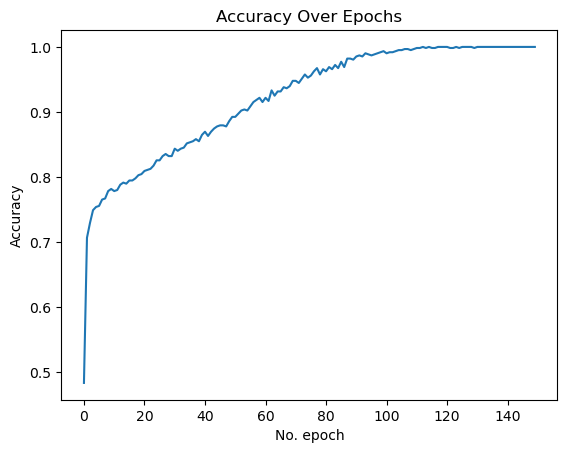

In [43]:
plt.plot(History.history['accuracy'])
plt.title('Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.show()

In [44]:
# création du modèle
def buildModel(optimizer):
    model = Sequential()
    model.add(Dense(128, activation = "relu"))
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(32, activation = "relu"))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    
    return model

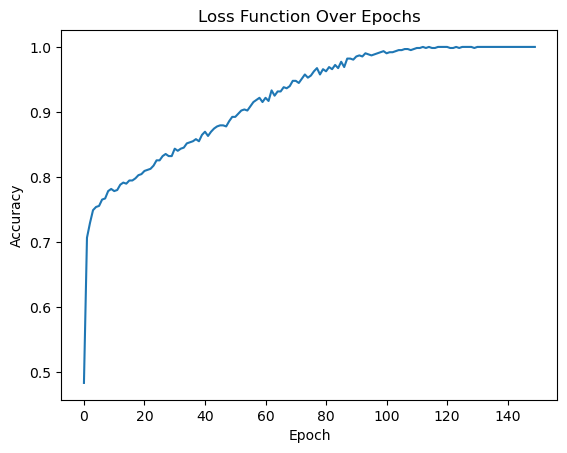

In [45]:
plt.plot(History.history['accuracy'])
plt.title('Loss Function Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

classifier = KerasRegressor(build_fn = buildModel)
#What hyperparameter we want to play with
parameters = {'batch_size' : [16, 32, 64, 128],
              'epochs' : [100, 150],
              'optimizer' : ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)
grid_search = grid_search.fit(x_train1, y_train1, verbose = 0)

/var/folders/nx/wts337112p53xn03jx2yz0r40000gn/T/ipykernel_45411/3983964247.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasRegressor(build_fn = buildModel)


1/1 [==============================] - 0s 32ms/step


In [47]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))

Best Parameters: {'batch_size': 16, 'epochs': 150, 'optimizer': 'rmsprop'}


In [48]:
bestClassifier = buildModel('adam')
HistoryBest = bestClassifier.fit(x = x_train1, y = y_train1, batch_size = 16, epochs =100 , verbose = 0)

In [49]:
scores = model.evaluate(x_train1,y_train1)

20/20 [==============================] - 0s 768us/step - loss: 0.0110 - accuracy: 1.0000


In [50]:
scores = model.evaluate(x_test1, y_test1)

5/5 [==============================] - 0s 933us/step - loss: 1.3940 - accuracy: 0.7338


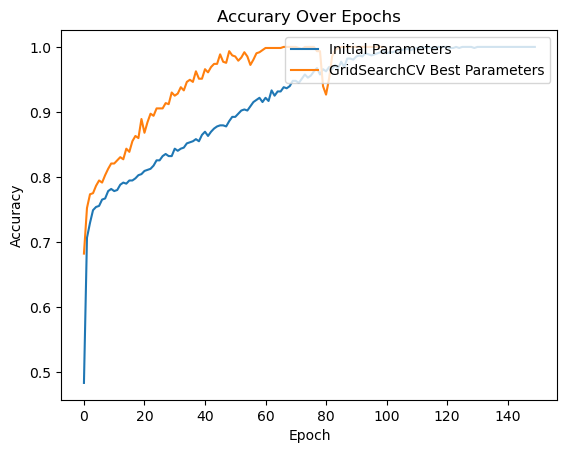

In [51]:
plt.plot(History.history['accuracy'], label = 'Initial Parameters')
plt.plot(HistoryBest.history['accuracy'], label = 'GridSearchCV Best Parameters')
plt.title('Accurary Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = "upper right")
plt.show()

De tous les modèles testés, Random Forrest a les meilleures résultats :

In [52]:
#since random forest classifier gave best accuracy, so applying that
model_final = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features = 'log2', n_estimators = 100)
model_final.fit(x_train, y_train)
y_pred1 = model_final.predict(x_test)
print('La précision sur le jeu de test est égale à : ', accuracy_score(y_test, y_pred1))

La précision sur le jeu de test est égale à :  0.8116883116883117


Affichage de la matrice de confusion :

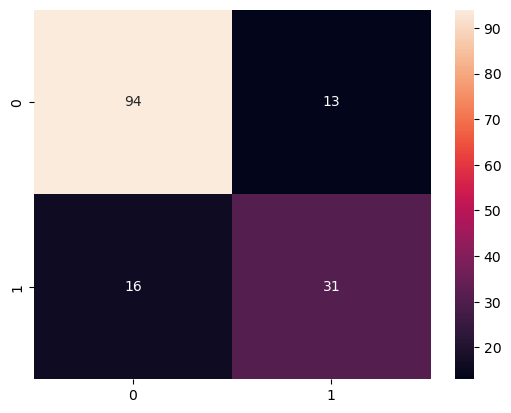

In [53]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred1)), annot=True)
plt.show()

In [54]:
# Source : https://medium.com/crossml/exploratory-data-analysis-eda-and-classification-on-pima-indian-diabetes-dataset-e4c649a666e9